In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "apple-stock-price-dataset"

# **Import**

In [2]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import**

In [3]:
data <- read.csv('/kaggle/input/apple-stock-price-dataset/Apple Dataset.csv')

In [4]:
str(data)

'data.frame':	10954 obs. of  7 variables:
 $ Date     : chr  "1980-12-12" "1980-12-15" "1980-12-16" "1980-12-17" ...
 $ Open     : num  0.128 0.122 0.113 0.116 0.119 ...
 $ High     : num  0.129 0.122 0.113 0.116 0.119 ...
 $ Low      : num  0.128 0.122 0.113 0.116 0.119 ...
 $ Close    : num  0.128 0.122 0.113 0.116 0.119 ...
 $ Adj.Close: num  0.0991 0.0939 0.087 0.0892 0.0917 ...
 $ Volume   : num  4.69e+08 1.76e+08 1.06e+08 8.64e+07 7.34e+07 ...


In [5]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date*,1,10954,5.477500e+03,3.162292e+03,5.477500e+03,5.477500e+03,4.060100e+03,1.000000,1.095400e+04,1.095300e+04,0.000000,-1.200329,3.021451e+01
Open,2,10954,2.153088e+01,4.445839e+01,5.223210e-01,8.754414e+00,6.387085e-01,0.049665,1.980200e+02,1.979703e+02,2.524959,5.332648,4.247832e-01
High,3,10954,2.176190e+01,4.493186e+01,5.334820e-01,8.841652e+00,6.544285e-01,0.049665,1.996200e+02,1.995703e+02,2.522308,5.309174,4.293070e-01
Low,4,10954,2.130822e+01,4.401358e+01,5.133930e-01,8.665619e+00,6.262992e-01,0.049107,1.970000e+02,1.969509e+02,2.527619,5.355273,4.205332e-01
Close,5,10954,2.154407e+01,4.449248e+01,5.245540e-01,8.756094e+00,6.416055e-01,0.049107,1.981100e+02,1.980609e+02,2.524788,5.330709,4.251090e-01
Adj.Close,6,10954,2.074751e+01,4.403894e+01,4.273330e-01,7.969436e+00,5.301214e-01,0.037900,1.975895e+02,1.975516e+02,2.571825,5.544734,4.207756e-01
Volume,7,10954,3.190792e+08,3.357446e+08,2.067128e+08,2.551390e+08,1.683282e+08,0.000000,7.421641e+09,7.421641e+09,3.561438,30.248199,3.207913e+06


In [6]:
summary(data)

     Date                Open                High                Low           
 Length:10954       Min.   :  0.04966   Min.   :  0.04966   Min.   :  0.04911  
 Class :character   1st Qu.:  0.29688   1st Qu.:  0.30357   1st Qu.:  0.29018  
 Mode  :character   Median :  0.52232   Median :  0.53348   Median :  0.51339  
                    Mean   : 21.53088   Mean   : 21.76190   Mean   : 21.30822  
                    3rd Qu.: 19.76750   3rd Qu.: 19.88857   3rd Qu.: 19.45777  
                    Max.   :198.02000   Max.   :199.61999   Max.   :197.00000  
     Close             Adj.Close            Volume         
 Min.   :  0.04911   Min.   :  0.0379   Min.   :0.000e+00  
 1st Qu.:  0.29688   1st Qu.:  0.2416   1st Qu.:1.140e+08  
 Median :  0.52455   Median :  0.4273   Median :2.067e+08  
 Mean   : 21.54407   Mean   : 20.7475   Mean   :3.191e+08  
 3rd Qu.: 19.68268   3rd Qu.: 17.0480   3rd Qu.:3.993e+08  
 Max.   :198.11000   Max.   :197.5895   Max.   :7.422e+09  

**Check missing value**

In [7]:
colSums(is.na(data))

Date      Open      High       Low     Close Adj.Close    Volume 
        0         0         0         0         0         0         0

**duplicate check**

In [8]:
sum(duplicated(data))

[1] 0

# **2. Data Transfrom**

In [9]:
data$Date <- as.Date(data$Date)

In [10]:
names(data) <- c('Date','Open','High','Low','Close','Adj','Volume')

**Data Check**

In [11]:
head(data)

,Date,Open,High,Low,Close,Adj,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
2,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
3,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
4,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
5,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
6,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097335,48630400


# **3. Data Visualization**

**Histogram**

In [12]:
p1 <- ggplot(data, aes(x= Open)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('Open Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <-ggplot(data, aes(x= High)) + geom_histogram(fill = 'blue',bins = 30 , col = 'white') + 
    theme_bw() +
    ggtitle('High Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <-ggplot(data, aes(x= Low)) + geom_histogram(fill = 'orange',bins = 30, col = 'white') +
    theme_bw() +
    ggtitle('Low Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <-ggplot(data, aes(x= Close)) + geom_histogram(fill = 'green',bins = 30, col = 'white' ) + 
    theme_bw() +
    ggtitle('Close Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <-ggplot(data, aes(x= Adj)) + geom_histogram(fill = 'yellow', bins = 30,, col = 'white') + 
    theme_bw() +
    ggtitle('Adj Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <-ggplot(data, aes(x= Volume)) + geom_histogram(fill = 'red',bins = 30 ,col = 'white') + 
    theme_bw() +
    ggtitle('Volume Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

In [13]:
options(repr.plot.width = 13.0, repr.plot.height = 13.0)

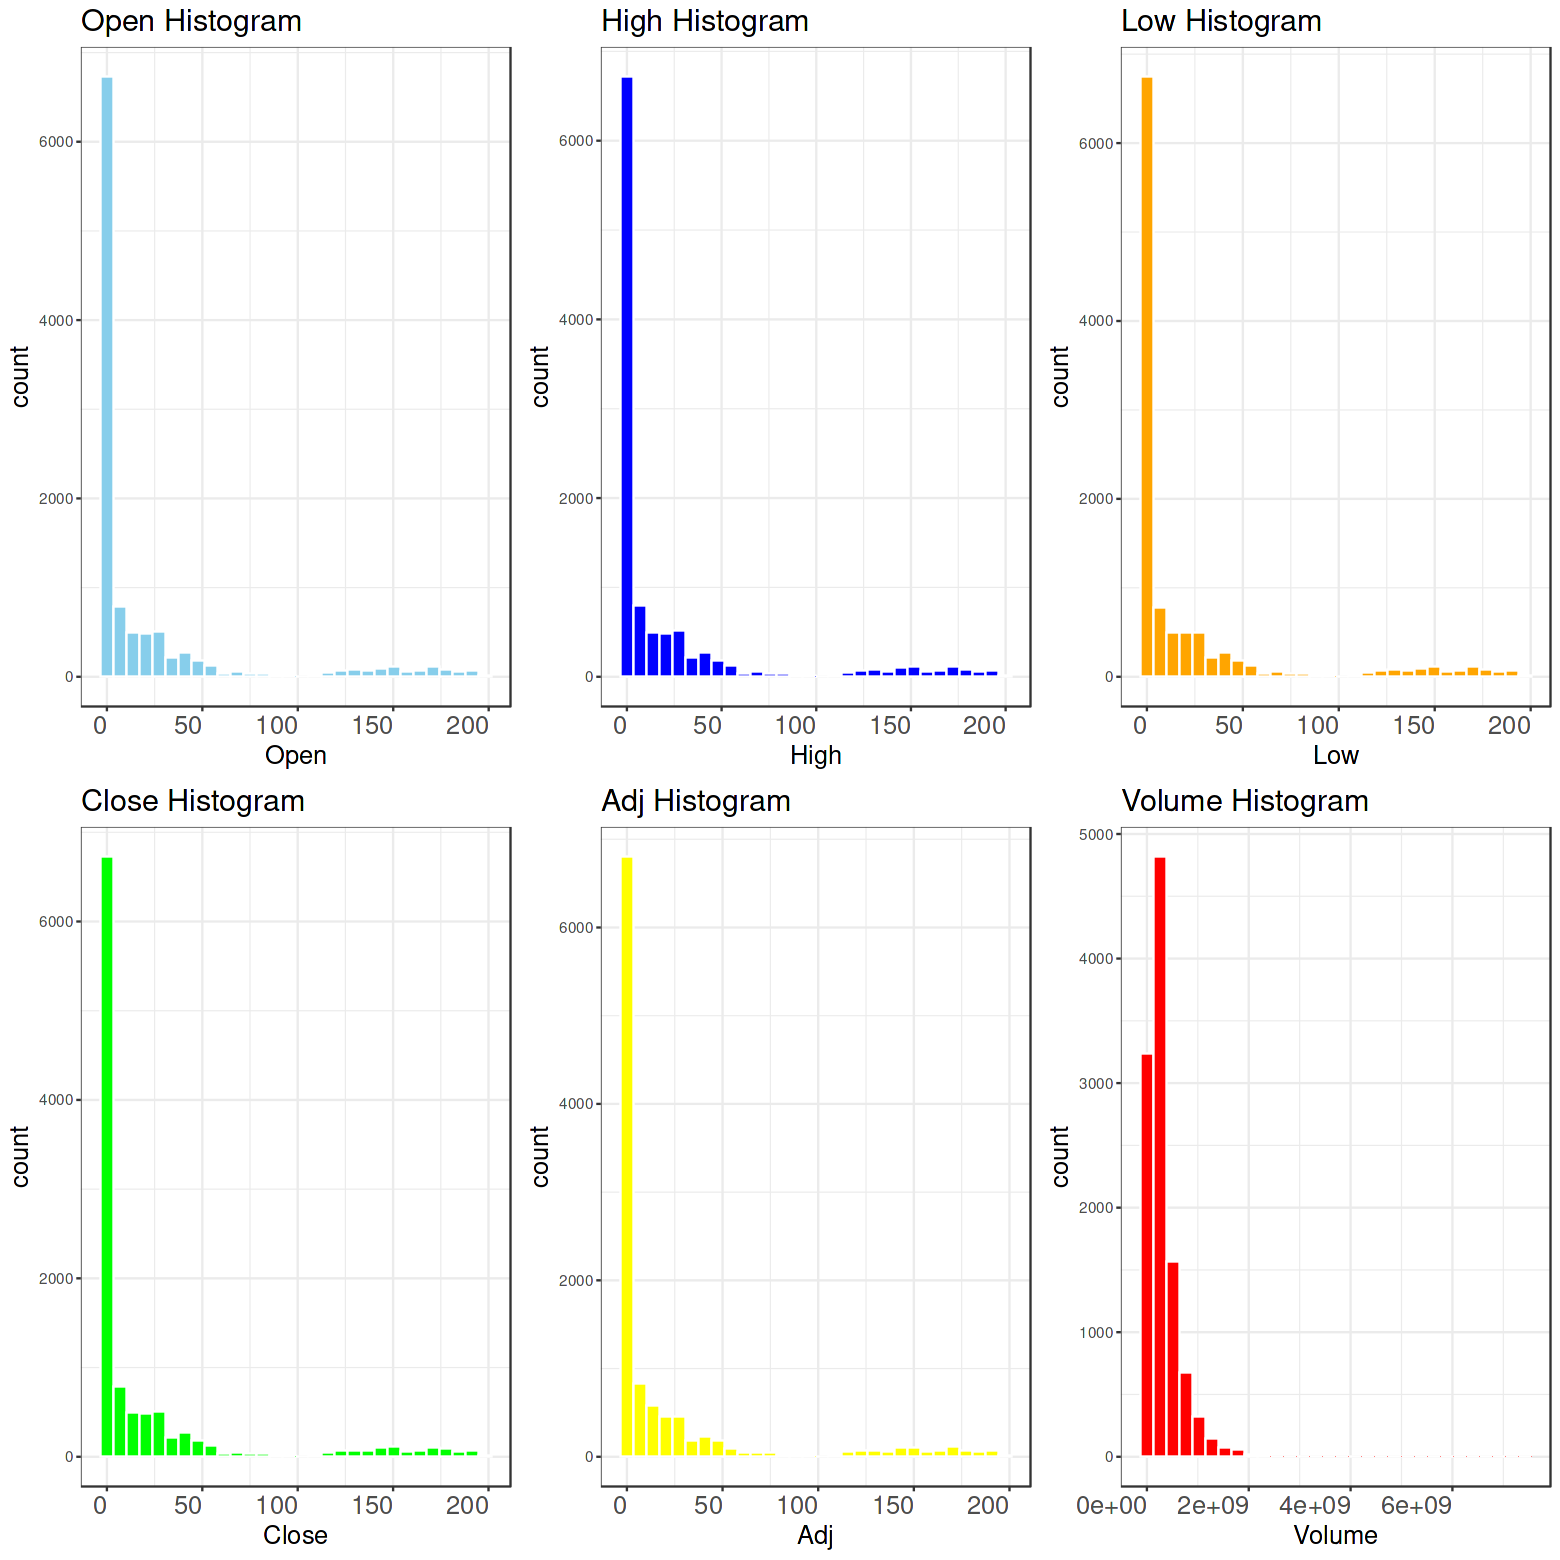

In [14]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

**Boxplot**

In [15]:
p1 <- ggplot(data, aes(x= Open)) + 
    geom_boxplot(fill = 'skyblue') + 
    theme_bw() + 
    ggtitle('Open Boxplot') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <- ggplot(data, aes(x= High)) + geom_boxplot(fill = 'blue') +
    theme_bw() + 
    ggtitle('High Boxplot') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(data, aes(x= Low)) + geom_boxplot(fill = 'orange') +
    theme_bw() + 
    ggtitle('Low Boxplot') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <- ggplot(data, aes(x= Close)) + geom_boxplot(fill = 'green') +    
    theme_bw() + 
    ggtitle('Close Boxplot') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <- ggplot(data, aes(x= Adj)) + geom_boxplot(fill = 'yellow') +
    theme_bw() + 
    ggtitle('Adj Boxplot') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <- ggplot(data, aes(x= Volume)) + geom_boxplot(fill = 'red') +
    theme_bw() + 
    ggtitle('Volume Boxplot') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

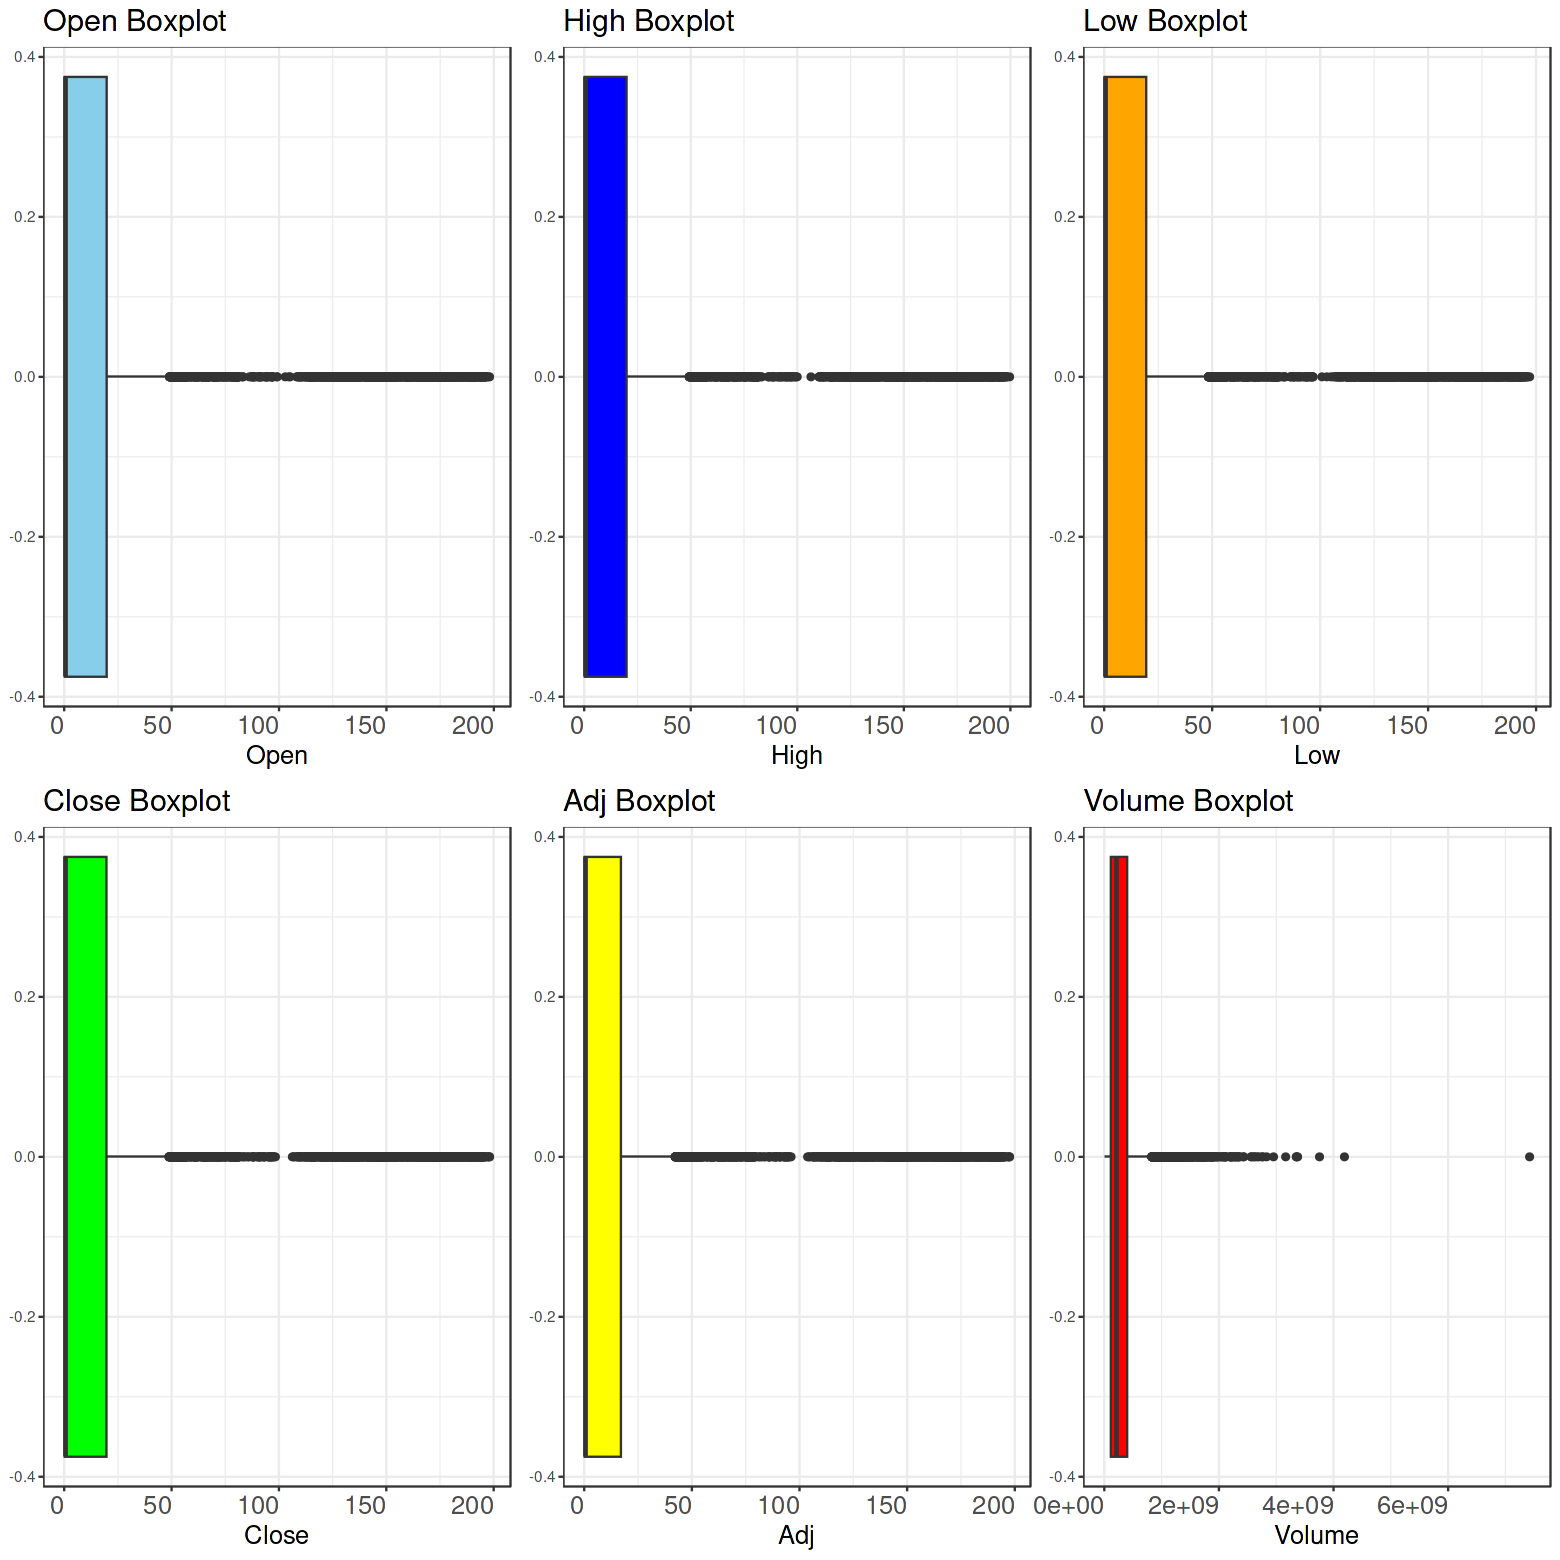

In [16]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

**Lineplot**

In [17]:
p1 <- ggplot(data, aes(x=Date, y= Open)) + geom_line(color = 'skyblue' ) + ggtitle('Change in \'Open\' by year') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <- ggplot(data, aes(x=Date, y= High)) + geom_line(color = 'blue') + ggtitle('Change in \'High\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(data, aes(x=Date, y= Low)) + geom_line(color = 'orange') + ggtitle('Change in \'Low\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <- ggplot(data, aes(x=Date, y= Close)) + geom_line(color = 'green') + ggtitle('Change in \'Close\' by year') + 
    theme_bw() +    
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <- ggplot(data, aes(x=Date, y= Adj)) + geom_line(color = 'yellow') + ggtitle('Change in \'Adj\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <- ggplot(data, aes(x=Date, y= Volume)) + geom_line(color = 'red') + ggtitle('Change in \'Volume\' by year') + 
    theme_bw() + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    ) 


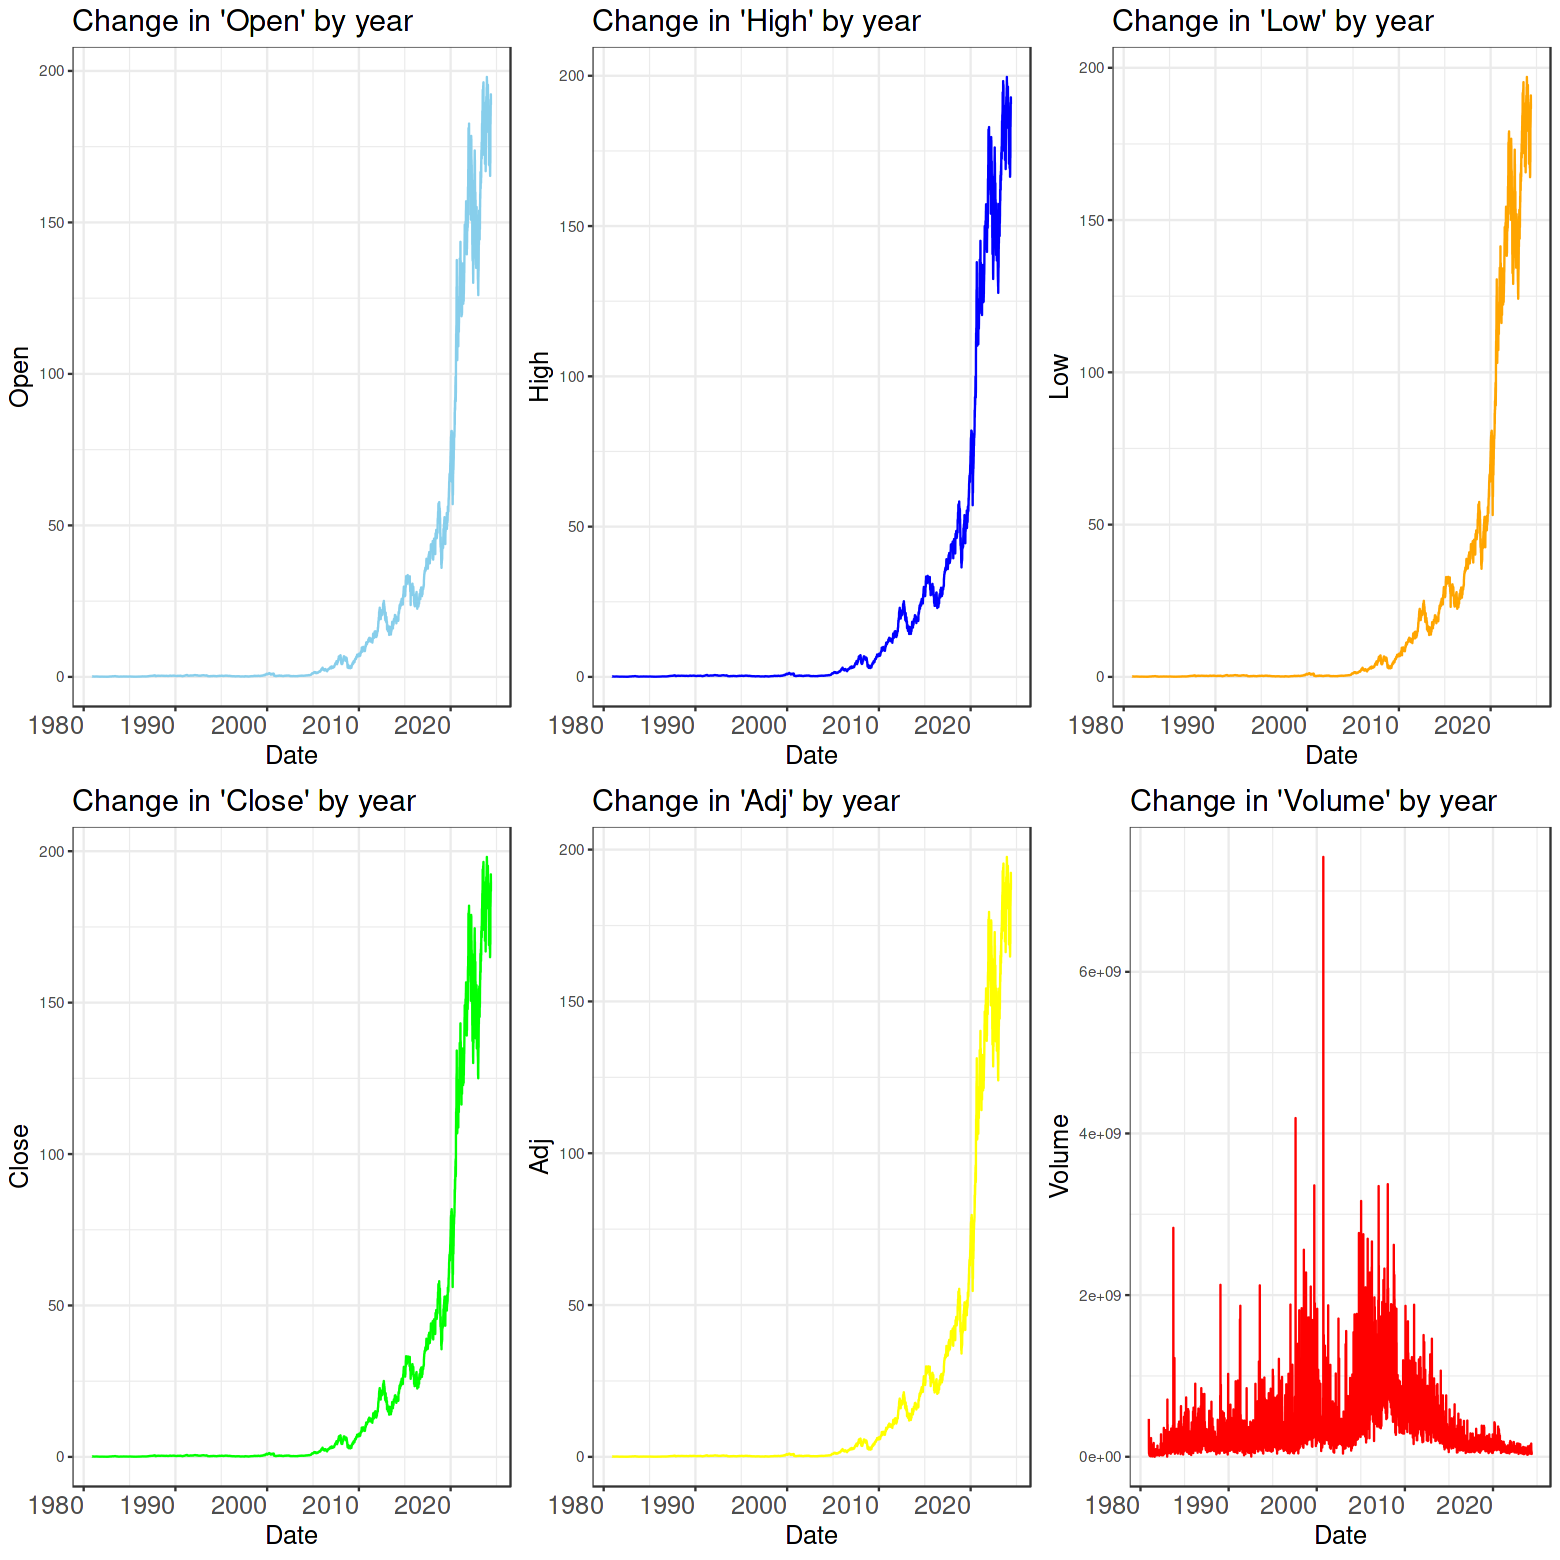

In [18]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

**Rolling windows(90 Days, 180Days, 300Days) of Close**

In [19]:
data2 <- data

temp <- zoo::zoo(data2$Close, data2$Date)
temp_rollmean90 <- zoo::rollmean(temp, 3 , fill = list(NA, NULL, NA))
temp_rollmean180 <- zoo::rollmean(temp, 6 , fill = list(NA, NULL, NA))
temp_rollmean300 <- zoo::rollmean(temp, 10 , fill = list(NA, NULL, NA))

data2$mean90_close <- zoo::coredata(temp_rollmean90)
data2$mean180_close <- zoo::coredata(temp_rollmean180)
data2$mean300_close <- zoo::coredata(temp_rollmean300)

In [20]:
p1 <- ggplot(data2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean90_close), color = 'red', size = 0.7) +
        ggtitle('Rolling windows(90 Days, 180Days, 300Days) of Close(90 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(data2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean180_close), color = 'blue', size = 0.7) +
        ggtitle('Rolling windows(90 Days, 180Days, 300Days) of Close(180 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p3 <- ggplot(data2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean300_close), color = 'orange', size = 0.7) +
        ggtitle('Rolling windows(90 Days, 180Days, 300Days) of Close(300 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_line()`).”


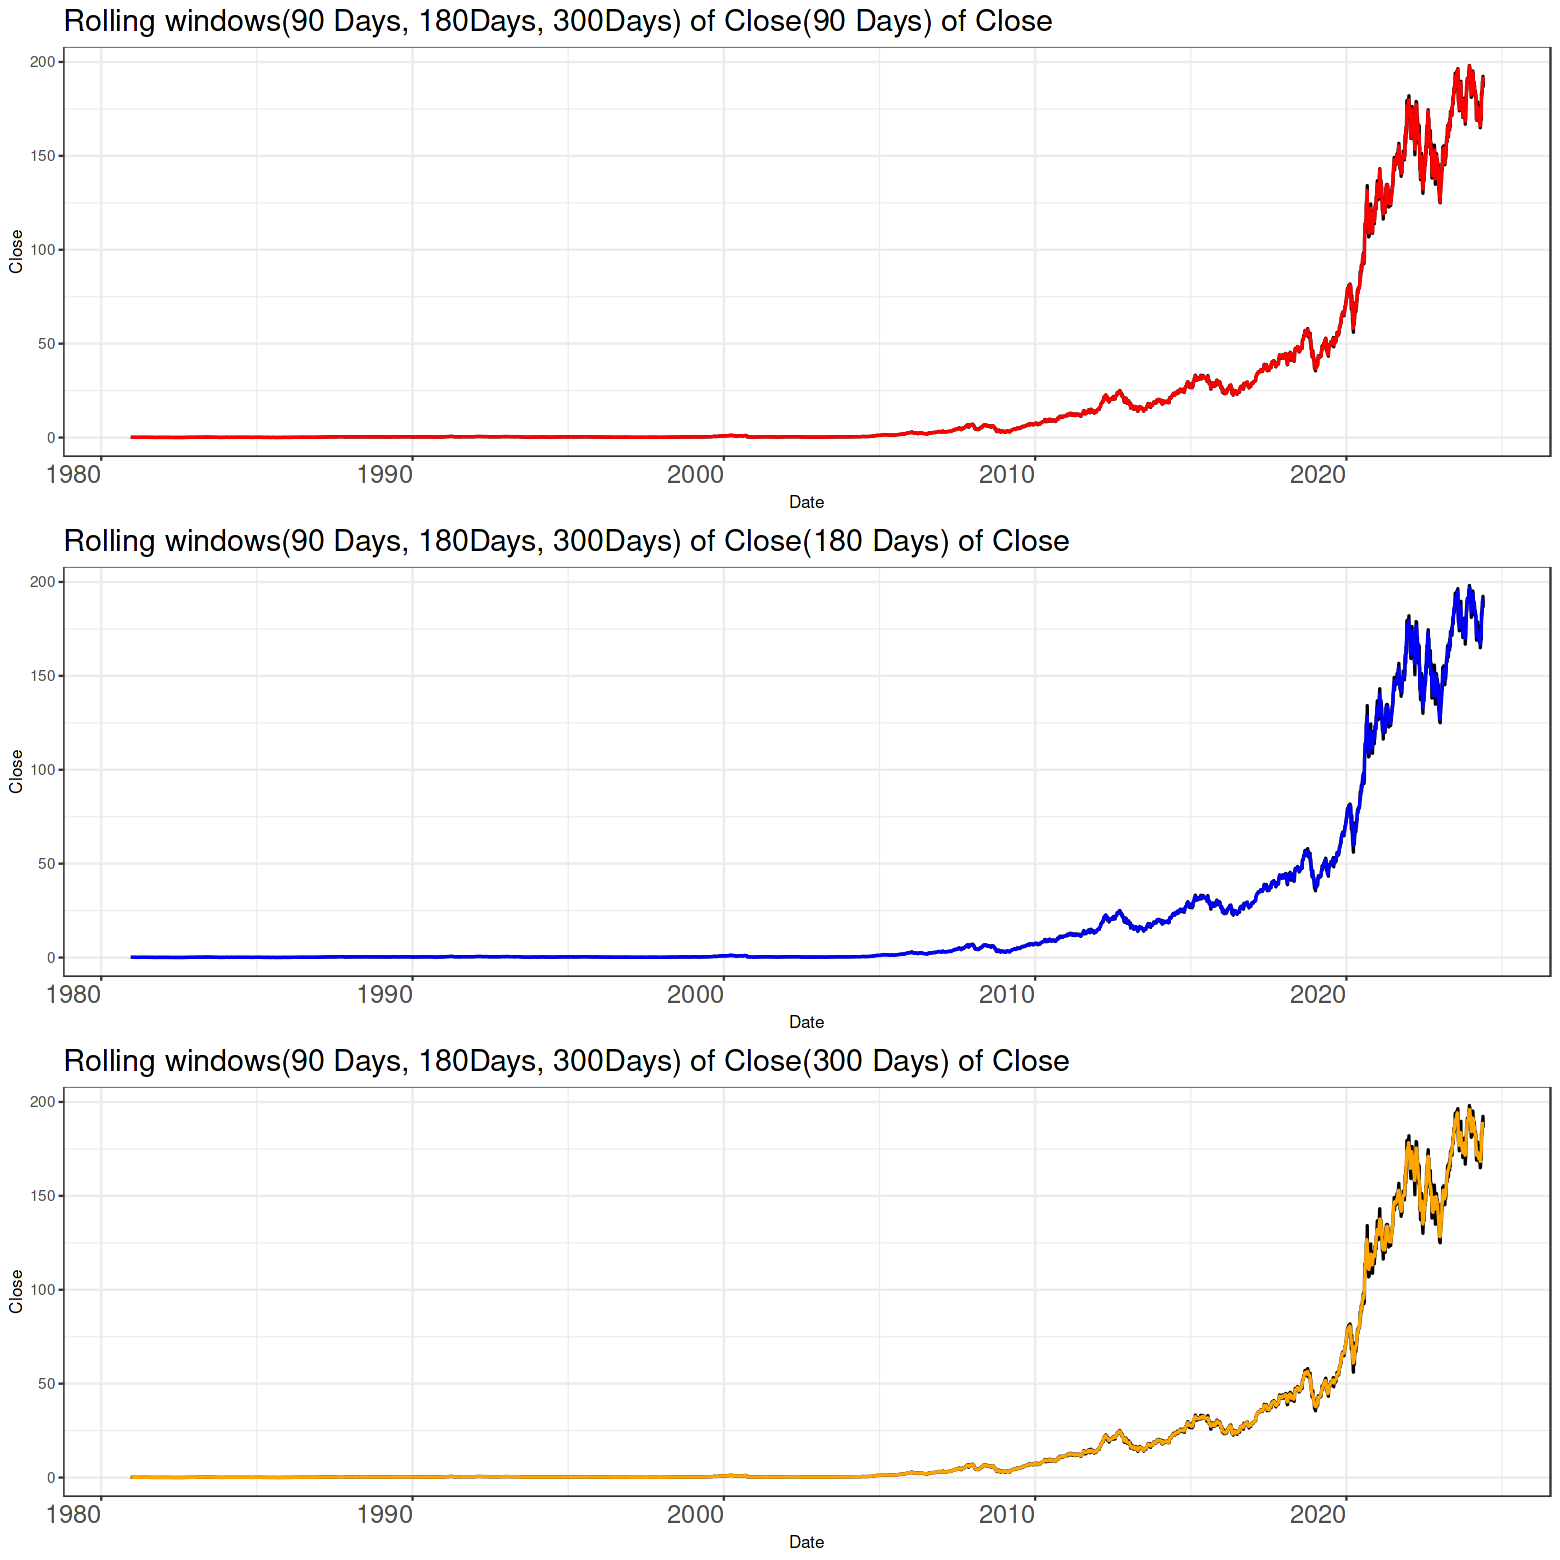

In [21]:
grid.arrange(p1,p2,p3, ncol = 1)

# **4. Modeling**

In [22]:
library(TTR)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [23]:
Close <- data[,'Close']
Close_ts <- ts(Close, frequency = 12, start = c(1980,12) , end = c(2024,5))

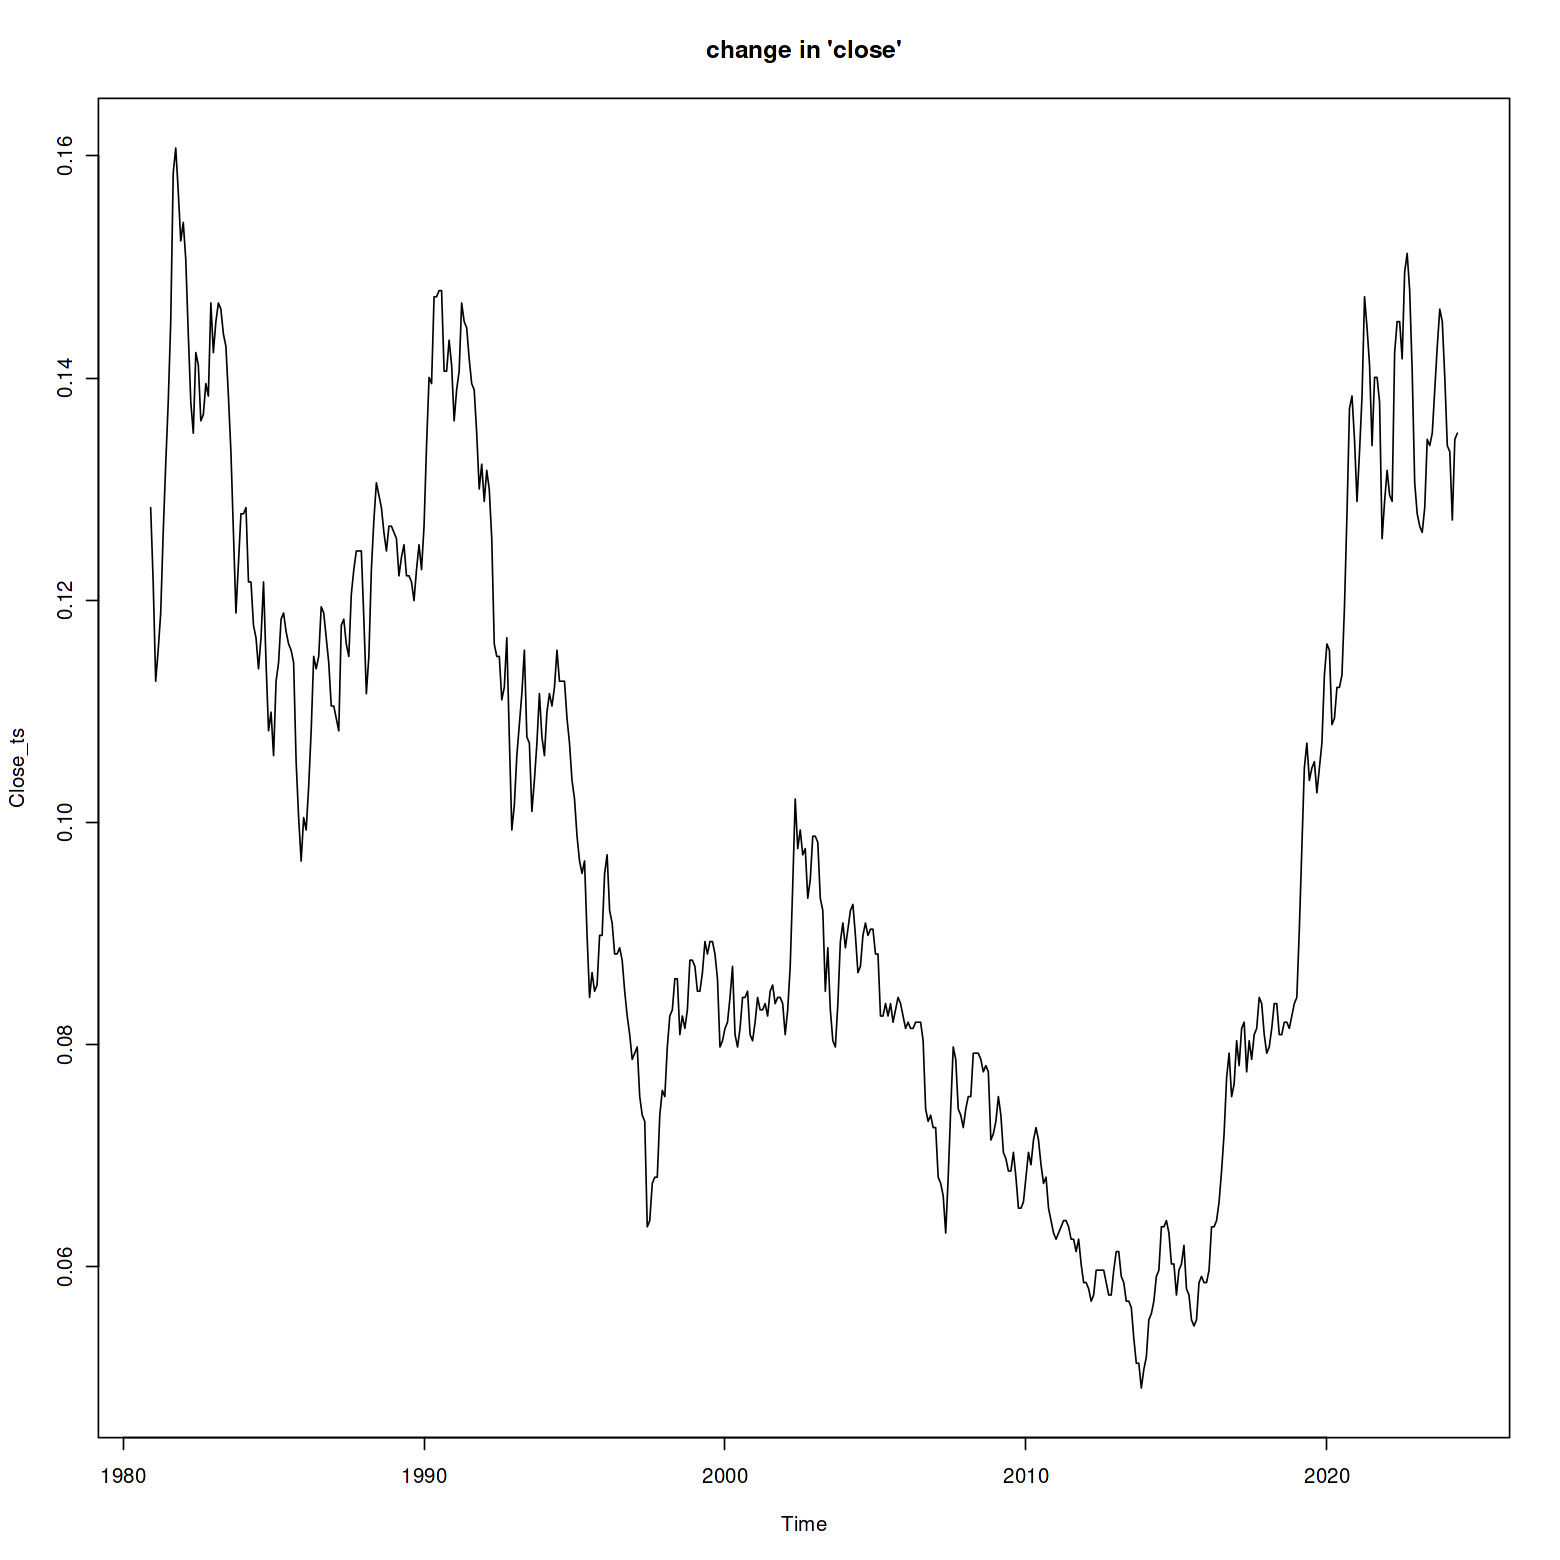

In [24]:
plot.ts(Close_ts, main = 'change in \'close\'')

In [25]:
clos_diff <- diff(Close_ts)

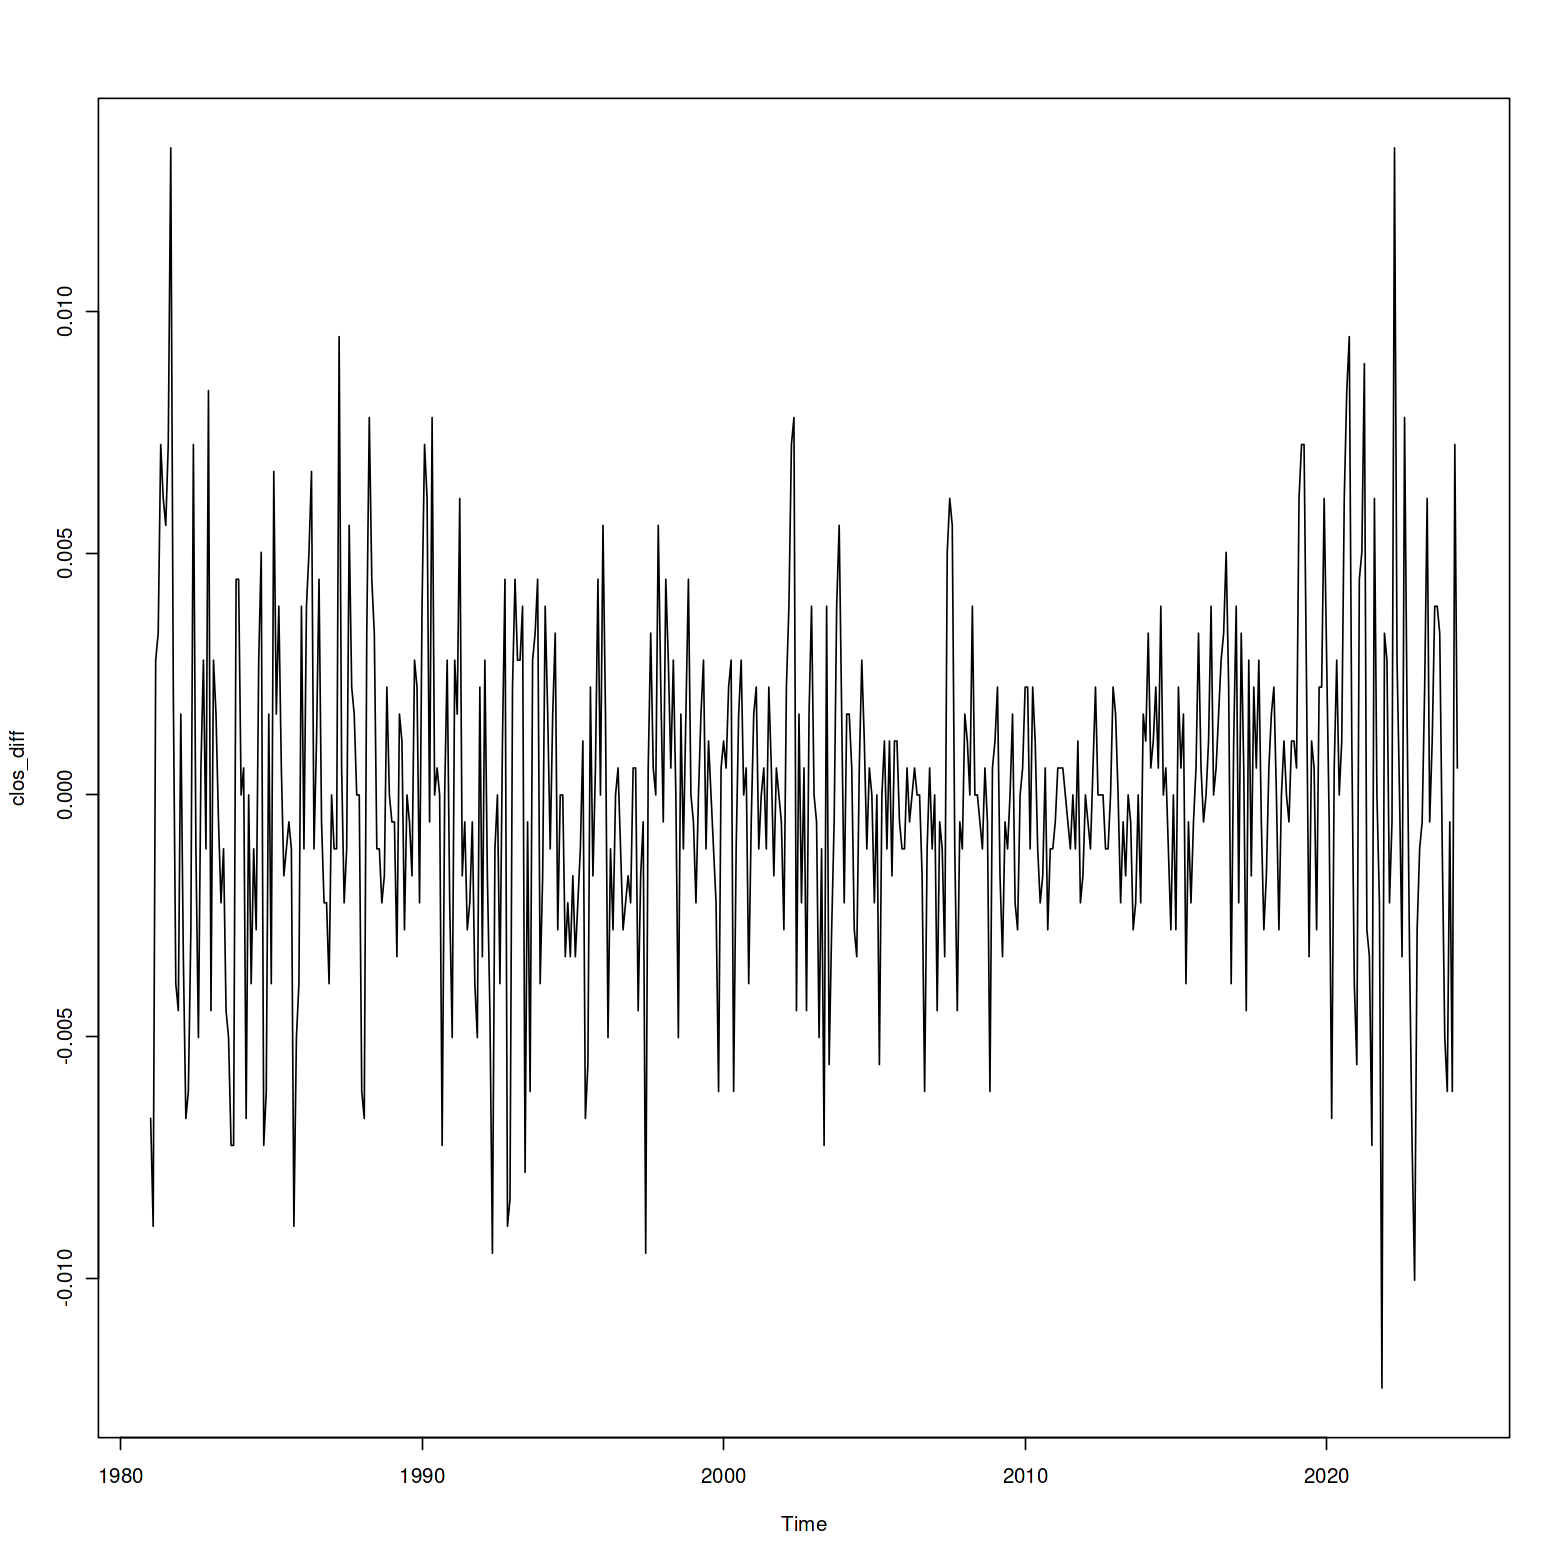

In [26]:
plot(clos_diff)

**Training Model**

In [27]:
fit <- auto.arima(Close_ts)

In [28]:
summary(fit)

Series: Close_ts 
ARIMA(1,1,3)(2,0,0)[12] 

Coefficients:
          ar1     ma1     ma2      ma3    sar1    sar2
      -0.7026  0.9627  0.2053  -0.0478  0.0397  0.0334
s.e.   0.1753  0.1808  0.0831   0.0527  0.0461  0.0475

sigma^2 = 1.136e-05:  log likelihood = 2229.6
AIC=-4445.2   AICc=-4444.98   BIC=-4415.41

Training set error measures:
                       ME        RMSE         MAE        MPE     MAPE     MASE
Training set 9.263183e-06 0.003347586 0.002536551 -0.0304126 2.564887 0.274311
                      ACF1
Training set -0.0004709842

**Arima Model**

In [29]:
model <- arima(Close_ts, order = c(1,1,3))

In [30]:
summary(model)


Call:
arima(x = Close_ts, order = c(1, 1, 3))

Coefficients:
         ar1      ma1      ma2      ma3
      0.6995  -0.4472  -0.1597  -0.1011
s.e.  0.1479   0.1529   0.0536   0.0444

sigma^2 estimated as 1.126e-05:  log likelihood = 2228.96,  aic = -4447.92

Training set error measures:
                       ME        RMSE         MAE         MPE     MAPE
Training set 1.402713e-05 0.003351883 0.002507308 -0.04469551 2.532844
                  MASE        ACF1
Training set 0.9811053 -0.00335078

**One year Forecast through Model 1**

In [31]:
pred <- forecast(model, h = 12)

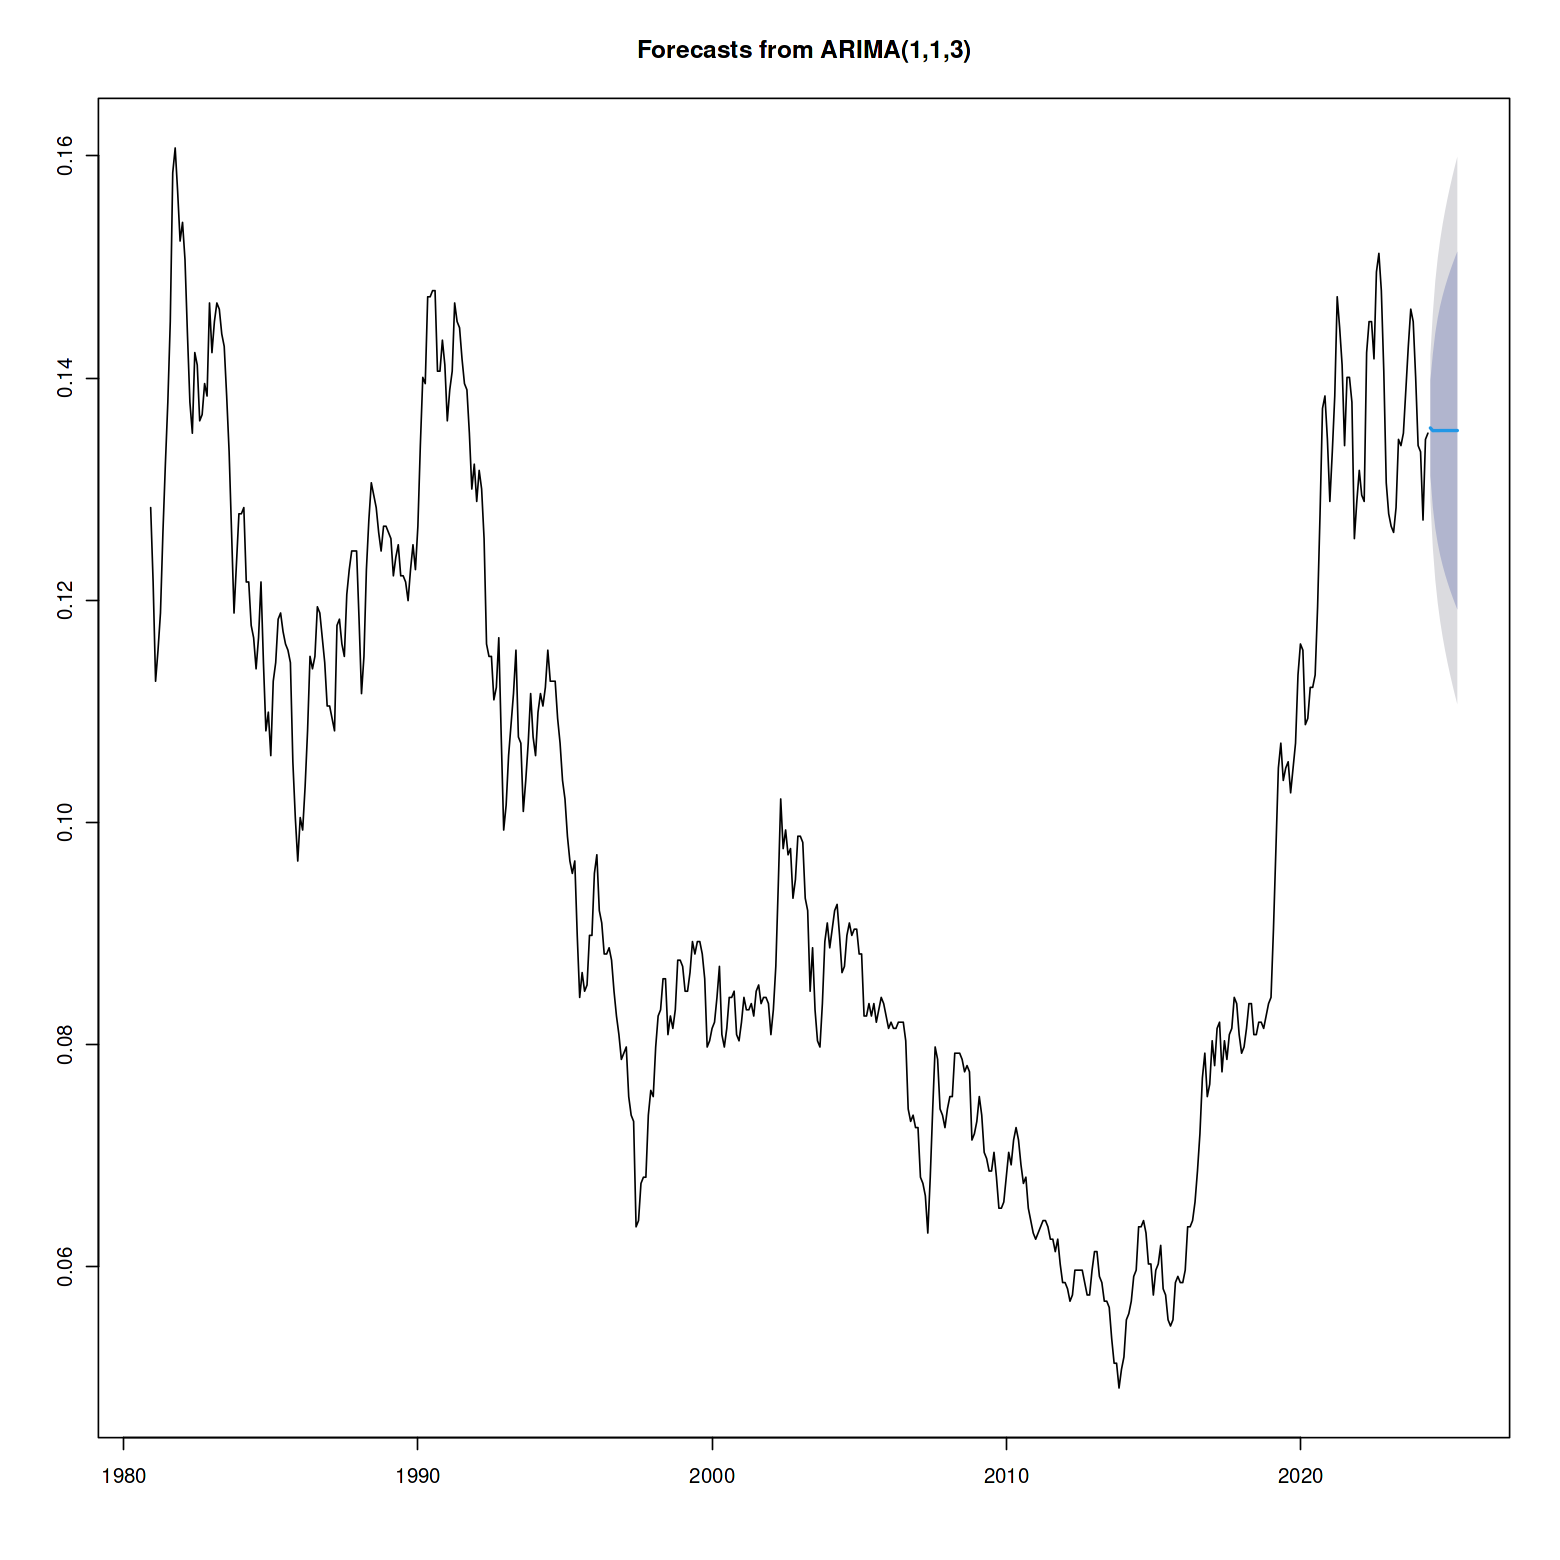

In [32]:
plot(pred)

In [33]:
model2 <- arima(Close_ts, order = c(2,0,0))

In [34]:
summary(model2)


Call:
arima(x = Close_ts, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.2390  -0.2485     0.1050
s.e.  0.0425   0.0426     0.0137

sigma^2 estimated as 1.134e-05:  log likelihood = 2229.18,  aic = -4450.36

Training set error measures:
                        ME        RMSE        MAE        MPE     MAPE      MASE
Training set -5.029003e-05 0.003367701 0.00251644 -0.1782502 2.541269 0.9846787
                    ACF1
Training set 0.009695007

**One year Forecast through Model2**

In [35]:
pred2 <- forecast(model2, h = 12)

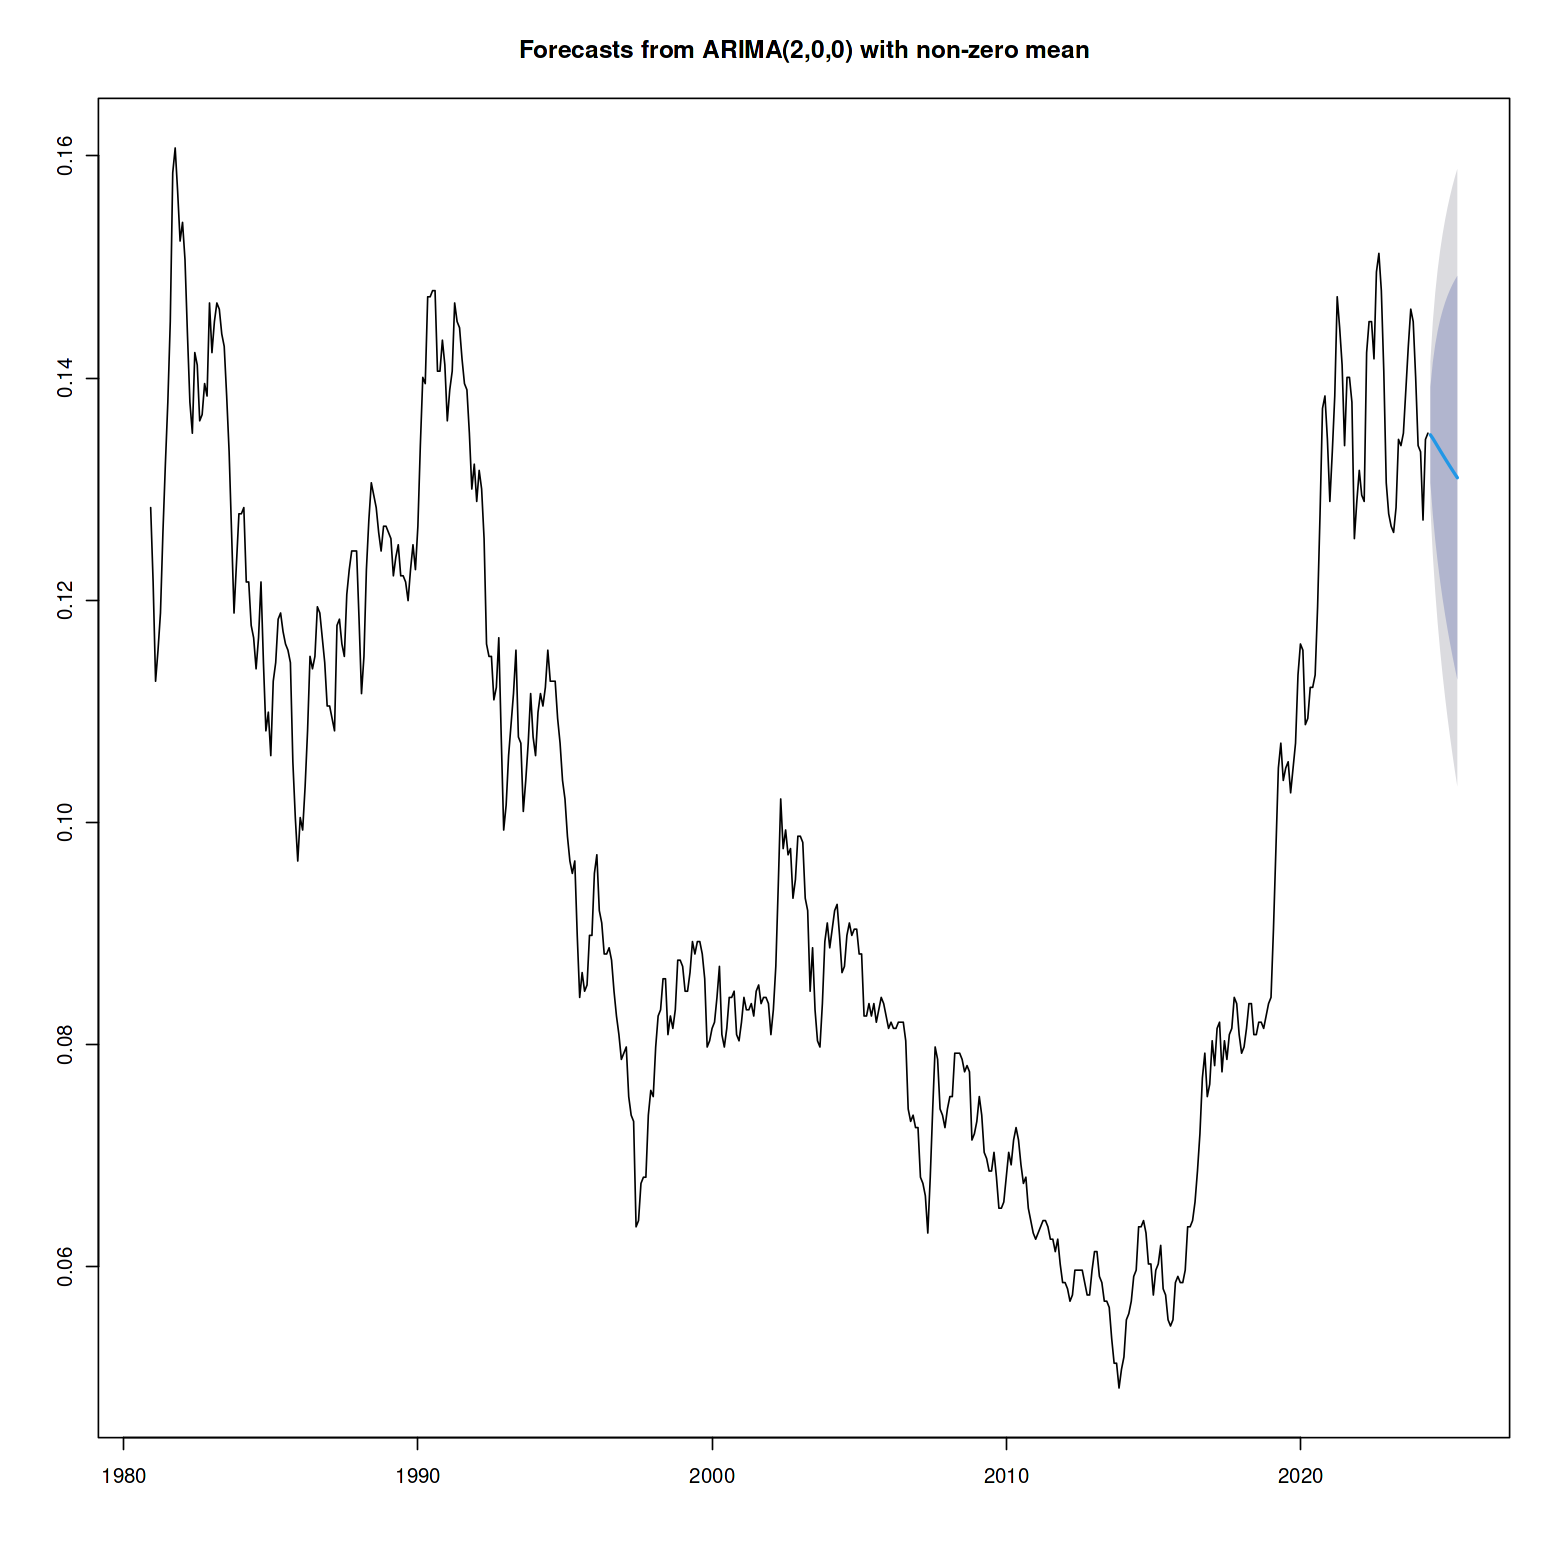

In [36]:
plot(pred2)

**Please leave your advice in the comments. Thank you**